# Prelude

### Edit distance:
1. Measurement of similarity between two sequences
2. viable edits: insertion, deletion, substitution
3. Minimum edits to change word w1 to w2
4. eg: good-> delete 'o'-> god
5. algorithm: dp (dynamic programming)
#### Dynamic programming for edit distance
define: distance lev(|a|, |b|) = <br>
lev(i,j) distance between first i and j characters in a and b <br>

different cases:

1. if min(i,j)=0: lev(i,j) = max(i,j). need to add all characters from the longer item
2. find minimum from the following neighboring cases:
    a. lev(i-1,j)+1: delete ai
    b. lev(i,j-1)+1: insert bj
    c. lev(i-1, j-1)+True(ai!=bj): +1 substitute ai with bj if not equal, + 0 if equal

# 10 classical models in ML
most from sklearn
1. classification: with predefined label

    a. C4.5 decision tree: sklearn.tree.DecisionTreeClassifier 
    
    b. Naive Bayes: sklearn.native_bayes.MultinomialNB
    
    c. SVM: sklearn.svm.SVC
    
    d. KNN: sklearn.neighbors.KNeighborsClassifier
    
    e. Adaboost: sklearn.ensemble. AdaBoostClassifier
    
    f. CART
    
2. Clustering: no predefined label

    a. K-Means: sklearn.cluster.KMeans
    
    b. EM: sklearn.mixture.GMM
    
3. Correlation analysis

    a. Apriori: from efficient_apriori import apriori
    
4. Link analysis

    a. PageRank: import networkx as nx
    

## Bayes
prior: P(A) from experience

posterior: probability P(A|B), know the results, the probability of the cause

conditional:P(A|B)
$$P(A|B) = P(A)\dfrac{P(B|A)}{P(B)}$$
$$P(A_i|B) = \dfrac{P(A_i)P(B|A_i)}{\sum_{i=1}^{n} P(A_i)P(B|A_i)}$$
proof:
$$P(A,B) = P(B)P(A|B)=P(A)P(B|A)$$
$$P(B) = P(B|A)P(A)+P(B|!A)P(!A)$$
example: a test for virus, true positive 99.9%, false positive 0.1%, demographic probbaility to get the virus 1/10000. If a person is tested positive, what's the probability that he has the virus?

A: has virus, B: test positive, P(A|B): has virus when tested positive, P(A): has virus = 1/10000, P(B|A): true positive = 99.9%, P(B|!A) = 0.1%
$$P(A|B) = \dfrac{P(A)*P(B|A)}{P(A)*P(B|A)+P(!A)*P(B|!A)}$$

### Naive Bayes
1. give data and label (human generated)
2. calculate class probability and conditional probability
3. use bayes formula for prediction

types:
1. discrete
2. continuous: uses normal distribution to fit P(B|Ai), Ai gives the distribution, and calculate the probability of x=B in this distribution, find the best fit

3 different assumptions for distribution model:
1. Gaussian
2. MultinomialNB
3. Bernoulli

In [1]:
from scipy import stats
mu = 179.5 
sigma = 3.697
x = 180
prob = stats.norm.pdf(x,mu,sigma)
print(prob)

0.10692733469896672


### Decision tree and random forest
__Three Common types__ different criteria for decision:
1. CART:
2. ID3:largest information gain
3. C4.5: gini index


#### information definitions
1. information: $I(X=x_i) = -log_2p(x_i)$
2. entropy = expectation of information, a measurement of uncertainty of information, increases with uncertainty: $H(X) = \sum p(x_i)I(x_i)$

#### random forest

1. bagging: use multiple weak classifiers, decided by vote of majority of trees. 
2. random forest: 
    
    a. sample randomness: bootstrap sample (random sampling with replacement to generate a sample of size with N = original sample size)
    
    b. feature randomness: select m features from M total features for a classifier tree
    
    c. no prune

## KNN (classifier, regressor)
1. How to select k: 
2. Types of distance/similarity: 

    a. Euler
    
    b. Manhattan distance: |xi-xj|+|yi-yj|

    c.Chebyshev distance: max(|x2-x1|,|y2-y1|)
    
    d.Cosine: for vectors, calculate angle between vectors
3. Data structure: KD tree (k-dimensional binary tree)
4. KNN for regression: to predict a value of unknown feature of a new point. Look for the closest k points in the graph, average over the neighbor's values.


## SVM (support vector machine)
1. key idea: for not half-spaces, use feature map into higher dimensions, then use separating hyperplane, then use linear regression
2. kernel:rbf, linear, sigmoid
3. sklearn.svm.SVC: high dimension
4. sklearn.svm.Linear: low dimension

# Graph Theory
## igraph
for complicated network problem, larger process capability, based on C
good for large dataset
## NetworkX
complicated network library in python, friendly for python
```
nx.Graph() for undirected graph
nx.Digraph() for directed graph
G.add_nodes_from(['E','F','G'])
G.remove_nodes_from(['D','E'])
G.add_edges_from(..)
G.add_weigted_edges_from #for weighted edges
G.remove_edge()
G.remove_edges_from()
G.edges() to obtain edges
G.nodes()

plot
layout = nx.spring_layout(G) #layout style
nx.draw(G, pos=layout, with_labels=True, hold = False)
plt.show()

#take subgraph
sub_graph = G.subgraph(['0','1','2'])
```

layout: spring_layout, circular_layout, random_layout, shell_layout

pagerank: {'A': 0.3488378286293671, 'B': 0.18604623938633386, 'C': 0.18604623938633386, 'D': 0.2790696925979645}


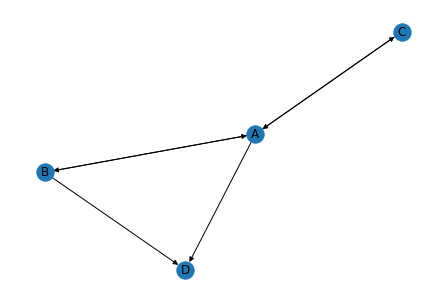

In [11]:
#networkX
import matplotlib.pyplot as plt
import networkx as nx
#create directed graph
G = nx.DiGraph() 
edges = [("A","B"),("A","C"),("A","D"),("B","A"),("B","D"),("C","A")]
#add edge
for edge in edges:
    G.add_edge(edge[0],edge[1])
#pagerank: weights for key nodes (connectivity of nodes)
pagerank_list = nx.pagerank(G, alpha=1)
print("pagerank:", pagerank_list)
layout = nx.spring_layout(G) #layout style
nx.draw(G, pos=layout, with_labels=True, hold = False)
plt.show()